<div class='alert alert-success'>
    <h1 align="center">Local Search Algorithms: Simulated Annealing for N-Queens</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
import sys
import time
import math
import random
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import clear_output

from utils import timed
from nqueens import NQueensState, NQueensStatePermutation

plt.rcParams['figure.figsize'] = (6, 6)

## N-Queens Problem
- **Goal**: Place N queens on a N-by-N chess board so that no two queens can attack each other.
- Thus a solution requires that no two queens share the same row, column or diagonal.

<p align="center">
    <img src="imgs/Four-Queens-Local-Search.png" width="80%">
</p>
<h6 align="center">4-Queens problem</h6>

### Problem formulation: First formulation
- **States**: each column contains only one queen.
- **Actions**: move a queen to another row in its column.
- **State Space Size**: $N^N$


### Problem formulation: Second formulation (Permuatation)
- **States**: each column and each row contains only one queen.
- **Actions**: move a queen to another row in its column which is not occupied.
- **State Space Size**: $N!$

In [2]:
state = NQueensState.random_state(N=8)
print(state)

[7, 5, 8, 2, 5, 8, 7, 3] <6>


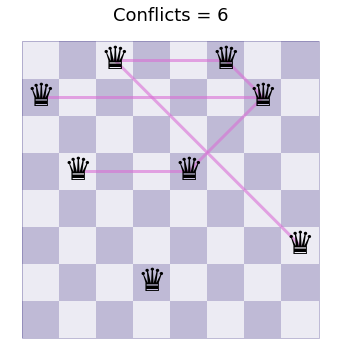

In [3]:
state.plot(show_conflicts=True)

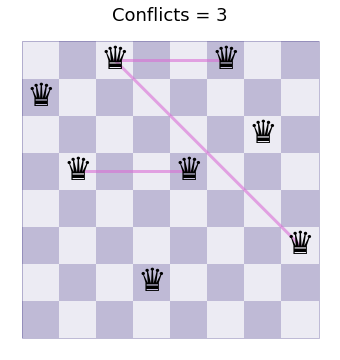

In [4]:
best_neighbor = state.best_neighbor()
best_neighbor.plot(show_conflicts=True)

In [5]:
best_neighbor

NQueensState(queens=[7, 5, 8, 2, 5, 8, 6, 3])

## Simulated Annealing
<img src="imgs/simulated_annealing.png" width="80%">

In [6]:
class SimulatedAnnealing:
    def __init__(self):
        self.history = []
        self.T = None
    
    def search(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        self.T = T0
        current = state

        while True:

            clear_output(wait=True)
            if verbose == 0: print(f'T = {self.T:.8f}, Conflicts = {current.conflicts():d}')
            elif verbose == 1: print(current)
            elif verbose == 2: current.plot(show_conflicts=False)
            elif verbose == 3: current.plot(show_conflicts=True)
            
            self.history.append(current)

            if self.T < tol or current.conflicts() == 0:
                return current

            neighbor = current.random_neighbor()
            delta_E = current.conflicts() - neighbor.conflicts()
            if delta_E >= 0: 
                current = neighbor
            elif random.random() < math.exp(delta_E / self.T):
                current = neighbor

            self.T = alpha * self.T

        return current
    
    def __call__(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        return self.search(state, T0, alpha, tol, verbose)
    

    def plot_history(self):
        plt.figure(figsize=(12, 4))

        conflicts = [state.conflicts() for state in self.history]
        plt.plot(range(len(conflicts)), conflicts)
        plt.xlabel('Iteration')
        plt.ylabel('Conflicts')
        plt.show()

In [7]:
initial_state = NQueensState.random_state(200)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000001, Conflicts = 9


<Solution with 9 conflicts found in 86.67 secs.>
 [127, 113, 184, 65, 36, 24, 80, 138, 197, 168, 95, 180, 200, 93, 147, 122, 104, 115, 100, 96, 148, 35, 25, 31, 13, 54, 110, 183, 50, 174, 4, 98, 84, 60, 77, 159, 111, 50, 14, 160, 2, 9, 186, 173, 149, 118, 103, 108, 94, 55, 49, 38, 163, 136, 15, 181, 158, 45, 43, 131, 78, 13, 120, 97, 120, 74, 157, 106, 39, 182, 195, 175, 47, 190, 109, 145, 27, 172, 7, 134, 3, 189, 61, 48, 8, 188, 22, 1, 154, 137, 144, 117, 87, 162, 91, 81, 92, 194, 89, 26, 125, 165, 151, 66, 70, 12, 187, 33, 152, 196, 41, 156, 198, 53, 58, 56, 10, 185, 16, 40, 141, 32, 19, 95, 28, 155, 69, 142, 5, 17, 20, 112, 126, 170, 73, 67, 81, 176, 140, 59, 150, 191, 23, 171, 52, 161, 199, 62, 83, 51, 42, 124, 135, 101, 76, 133, 6, 177, 114, 11, 129, 86, 121, 18, 128, 119, 146, 30, 179, 70, 82, 105, 34, 123, 164, 167, 143, 178, 44, 139, 21, 46, 166, 132, 90, 192, 99, 57, 193, 88, 107, 91, 79, 130, 63, 29, 72, 139, 37, 169] <9>


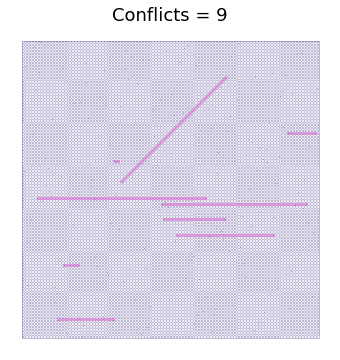

In [8]:
solution.plot(show_conflicts=True)

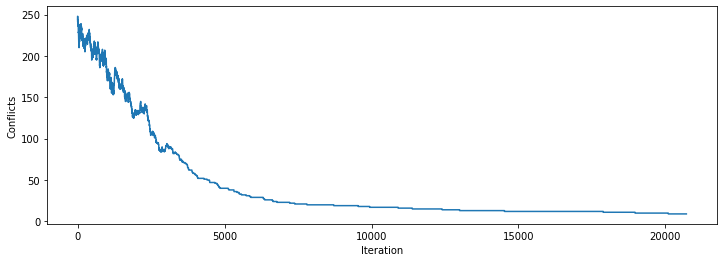

In [9]:
sa.plot_history()

In [10]:
def update_plot(i, show_conflicts):
    width, height = 512, 512
    fc='darkslateblue'
    
    state = sa.history[i - 1]
    N = state.N
    w, h = width // N, height // N

    # draw chess board
    for i in range(N):
        for j in range(N):
            alpha = 0.35 if (i + j) % 2 == 0 else 0.1
            cell = plt.Rectangle((i * w, j * h), w, h, fc=fc, alpha=alpha)
            plt.gca().add_patch(cell)
            
    border = plt.Rectangle((0, 0), N * w, N * h, ec=fc, fc='w', alpha=0.35)
    plt.gca().add_patch(border)

    # show conflicts
    if show_conflicts:
        for i in range(N - 1):
            row_i = state.queens[i]
            for j in range(i + 1, N):
                row_j = state.queens[j]
                if row_i == row_j or abs(row_i - row_j) == j - i:
                    x1, x2 = i * w + w // 2, j * w + w // 2
                    y1, y2 = (row_i - 1) * h + h // 2, (row_j - 1) * h + h // 2
                    line = plt.Line2D((x1, x2), (y1, y2), lw=3, ls='-', color='orchid', alpha=0.6)
                    plt.gca().add_line(line)

    # place queens on chess board
    for col, row in enumerate(state.queens):
        c = 'k' if (col + row) % 2 == 0 else 'w'
        x = col * w + w // 2
        y = (row - 1) * h + h // 2
        fs = w // 2.5
        plt.text(x, y, '♛', color='k', fontsize=fs, ha='center', va='center')

    plt.axis('square')
    plt.axis('off')
    plt.xticks(())
    plt.yticks(())
    plt.title("Conflicts = {}".format(state.conflicts()), fontsize=18)
    plt.show()

In [11]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=20714, min=1), Checkbox(value=True, description…

## Permutation

In [12]:
initial_state = NQueensStatePermutation.random_state(200)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000032, Conflicts = 0


<Solution with 0 conflicts found in 50.90 secs.>
 [77, 40, 154, 16, 194, 46, 29, 58, 195, 172, 104, 89, 86, 123, 193, 63, 96, 67, 14, 131, 186, 119, 115, 48, 128, 196, 69, 116, 64, 143, 180, 2, 129, 108, 36, 182, 178, 153, 184, 106, 80, 122, 132, 3, 28, 190, 34, 78, 41, 164, 103, 98, 61, 177, 49, 121, 162, 26, 35, 192, 9, 110, 130, 75, 93, 51, 189, 197, 90, 73, 141, 30, 87, 24, 74, 157, 171, 147, 18, 25, 124, 107, 12, 47, 95, 23, 145, 183, 82, 188, 135, 175, 54, 169, 185, 52, 43, 10, 136, 27, 99, 32, 92, 168, 161, 79, 133, 57, 200, 163, 7, 198, 56, 8, 101, 19, 84, 70, 4, 97, 11, 33, 6, 60, 5, 117, 111, 160, 174, 53, 165, 149, 59, 191, 139, 42, 44, 151, 159, 109, 120, 142, 125, 150, 100, 155, 170, 50, 137, 181, 126, 148, 71, 22, 15, 94, 173, 39, 156, 167, 66, 72, 134, 179, 37, 199, 62, 187, 85, 20, 68, 38, 114, 176, 83, 138, 102, 112, 144, 127, 13, 31, 76, 158, 1, 152, 88, 105, 140, 65, 91, 17, 146, 166, 81, 55, 45, 118, 113, 21] <0>


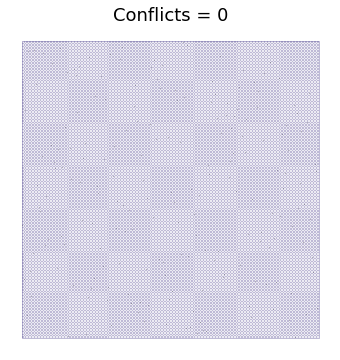

In [13]:
solution.plot(show_conflicts=True)

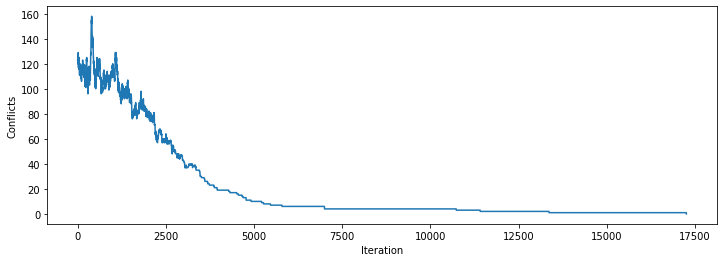

In [14]:
sa.plot_history()

In [15]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=17254, min=1), Checkbox(value=True, description…

## Animation

In [20]:
N = 10
initial_state = NQueensState.random_state(N)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.98, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000053, Conflicts = 0


<Solution with 0 conflicts found in 0.50 secs.>
 [6, 8, 3, 1, 9, 7, 10, 4, 2, 5] <0>


In [21]:
len(sa.history)

830

In [26]:
# remove states that are equal to their previous state in the history
reduced = [sa.history[0]]
for i in range(1, len(sa.history)):
    if sa.history[i].queens != reduced[-1].queens:
        reduced.append(sa.history[i])

print(len(reduced))
    

150


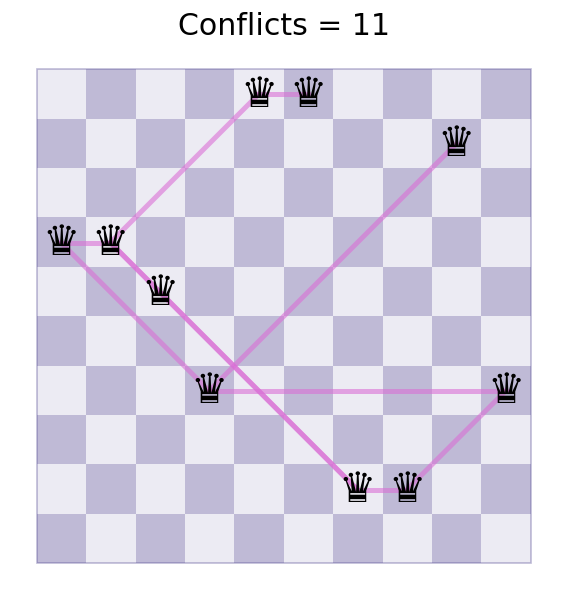

In [27]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
rc('animation', html='html5')


fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot([], [], lw=2) 


def animate(i):
    state = reduced[i]
    ax.clear()
    state.plot(ax, show_conflicts=True)
    return line,

anim = FuncAnimation(fig, animate, frames=range(len(reduced)), interval=100, blit=True, repeat=True, repeat_delay=2000)


anim.save(f'imgs/{N}-queens.gif', writer='imagemagick')

In [28]:
anim